## Esercitazione di potenziamento del 30 Maggio 2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.utilities.lambdify import lambdify

from scipy.io import loadmat
import scipy.linalg as spl
import RisolviSis as utils

## Esercizio 1

-   Valutare in aritmetica floating point l'espressione
$f(x)=\frac{1}{x}-\frac{1}{(x+0.04)}$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$. 

                                                [1 punto]
- Calcolare l'indice di condizionamente del problema di valutare la funzione $f(x)$ al variare x e dedurre a partire da quale valore di x esso  assume valori molto elevati. Dire cosa rappresenta l'indice di condizionamento di un problema e dire cosa misura. 

                                                [5 punti]

- Calcolare $f(x)$ per il valore di x precedente  a quello individuato dal punto precedente. perturbare questo x del 10% ed indicarlo con xp. Calcolare l'errore relativo di xp rispetto ad x. Cosa si ottiene

                                                [1 punto]
    
- Determinare se la funzione $f(x)$ è numericamente stabile? E nel caso non lo sia individuare la causa della sua instabilità.

                                                [2 punti]
 
- Fornire una formula alternativa $g(x)$ algebricamente equivalente ma numericamente più stabile. 

                                                 [2 punti]
- Calcolare l'errore relativo della funzione $f(x)$ rispetto alla funzione $g(x)$ e visuarlo graficamente in scla logaritmica sia sulle ascisse che sulle ordinate

                                                [1 punto]

Derivata di f : (s + 0.04)**(-2) - 1/s**2
 x  
 [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19
 1.e+20]
 spacing  
 [2.22044605e-16 1.77635684e-15 1.42108547e-14 1.13686838e-13
 1.81898940e-12 1.45519152e-11 1.16415322e-10 1.86264515e-09
 1.49011612e-08 1.19209290e-07 1.90734863e-06 1.52587891e-05
 1.22070312e-04 1.95312500e-03 1.56250000e-02 1.25000000e-01
 2.00000000e+00 1.60000000e+01 1.28000000e+02 2.04800000e+03
 1.63840000e+04]
condizionamento  [1.96153846 1.99601594 1.99960016 1.99996    1.999996   1.9999996
 1.99999996 2.00000006 1.99999999 2.00000257 2.00000086 2.00052087
 2.00731911 1.98035137 2.13162821        inf        inf        inf
        nan        nan        nan]
Errore sui dati  0.1
Errore sui risultati  0.09090909090909095
Errore relativo  [5.e+01 5.e+02 5.e+03 5.e+04 5.e+05 5.e+06 5.e+07 5.e+08 5.e+09 5.e+10
 5.e+11 5.e+12 5.e+13 5.e+14 5.e+15 5.e+16 5.e+17 5.e+18 5.e+19 

C:\Users\tommaso.ceredi\AppData\Local\Temp\ipykernel_14812\1985452410.py:13: RuntimeWarning: divide by zero encountered in divide
  condizionamento=np.abs(df_numerica(x)*x/f_numerica(x))
C:\Users\tommaso.ceredi\AppData\Local\Temp\ipykernel_14812\1985452410.py:13: RuntimeWarning: invalid value encountered in divide
  condizionamento=np.abs(df_numerica(x)*x/f_numerica(x))


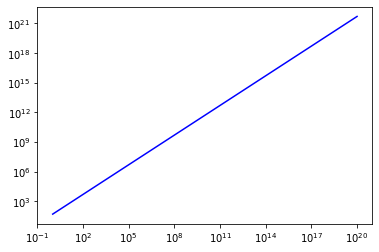

In [15]:
# Primo punto
x=10.0**np.arange(21)           #utilizzo 10.0 per avere un numpy array x con dtype float
f = lambda x: 1/x+1/(x+0.04)
fx=f(x)

# Secondo punto
s=sym.symbols('s')
fs=1/s-1/(s+0.04) # definisco la funzione simbolica fs
dfs=sym.diff(fs,s,1) # definisco la derivata prima simbolica dfs
print( "Derivata di f : {}".format(dfs))
df_numerica= lambdify(s,dfs,np) # definisco la derivata prima numerica df_numerica
f_numerica=lambdify(s,fs,np) # definisco la funzione numerica f_numerica
condizionamento=np.abs(df_numerica(x)*x/f_numerica(x)) # calcolo l'indice di condizionamento
spacing=np.spacing(x) # calcolo lo spacing (distanza tra due numeri consecutivi) di x
print(" x ",'\n', x)
print(" spacing ",'\n', spacing)
print("condizionamento ", condizionamento)
# l'indice di condizionamento è molto grande da x=10**15 in poi.
# L'indice di condizionamento di un problema è una misura della sensibilità o della stabilità numerica di un calcolo o di un algoritmo rispetto alle perturbazioni nei dati di input. 
#   Esso fornisce una stima di quanto i risultati di un problema possono variare in risposta a piccole variazioni o errori nei dati di input.
# In generale, l'indice di condizionamento quantifica quanto un problema sia "ben condizionato" o "mal condizionato". 
#   Un problema ben condizionato ha un indice di condizionamento basso, il che significa che anche piccole perturbazioni nei dati di input generano solo piccole variazioni nei risultati. 
#   D'altra parte, un problema mal condizionato ha un indice di condizionamento elevato, il che significa che anche piccole perturbazioni nei dati di input possono causare variazioni significative nei risultati.

# Terzo punto
xx=1e14
fxx=f(xx)
xxp=xx+0.1*xx # xxp è la perturbazione di xx
err_d=abs(xx-xxp)/abs(xx) # errore sui dati
fxxp=f(xxp) # fxxp è il risultato della funzione f(x) calcolata in xxp
err_f=abs(fxxp-fxx)/abs(fxx) # errore sui risultati
print("Errore sui dati ",err_d)
print("Errore sui risultati ",err_f)

# Quarto punto
# La funzione f(x) non è numericamente stabile, perchè per alcuni dei valori in cui la calcoliamo, si ha una somma algebrica di numeri molto vicini tra loro in modulo e con segno opposto che porta alla cancellazione di cifre significative.

# Quinto punto
g = lambda x: 0.04/(x*(x+0.04)) # definisco la funzione g(x) numericamente stabile
#Calcoliamo l'errore relativo di f(x) rispetto alla formula equivalente ma numericamente stabile g(x)
Erelx=np.abs(f(x)-g(x))/np.abs(g(x))
print("Errore relativo ",Erelx)
plt.loglog(x,Erelx,'b-')

## Esercizo 2
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``testC.mat.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto. Argomentare dal punto di vista teorico la scelta fatta e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 


La soluzione esatta del sistema lineare è il vettore x=[1,1,1,1...1 1].

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testC.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``


                                                       
                                               [13 punti]

In [7]:
# Importo i dati
dati = loadmat('testC.mat')
A=dati["A"] 
b=dati["b"]
# calcolo il numero di righe e colonne della matrice A
n,m=A.shape
print("Numero di righe e colonne della matrice A ",n,m)
# controllo se la matrice è densa o sparsa
nz=np.count_nonzero(A)/(n*m)
perc_nz=nz*100
print("Percentuale elementi diversi da zero ",perc_nz,"%") # La matrice è piccola e densa
# Controllo se la matrice è simmetrica
if (A.transpose()==A).all():
    print("La matrice è simmetrica")
# Controllo se la matrice è definita positiva
if np.all(np.linalg.eigvals(A) > 0):
    print("La matrice è definita positiva")
# Calcolo il numero di condizionamento della matrice A
condA=np.linalg.cond(A)
print("Numero di condizionamento della matrice A ",condA)
# Dato che la matrice è simmetrica ma non positiva definita, il numero di condizionamento è molto grande e quindi il problema è mal condizionato.
#   Deduco che è meglio utilizzare la fattorizzazione QR che è più stabile della fattorizzazione LU.
# La stabilità di un metodo di fattorizzazione si riferisce alla capacità di un algoritmo di fattorizzazione di mantenere la precisione numerica e di produrre risultati accurati anche in presenza di errori di arrotondamento.
xesatta=np.ones_like(b) # vettore soluzione esatta
Q,R=spl.qr(A) # fattorizzazione QR
yy=Q.T@b # calcolo il prodotto matrice vettore
xqr,flag=utils.Usolve(R,yy) # risolvo il sistema lineare
err_rel=np.linalg.norm(xqr-xesatta)/np.linalg.norm(xesatta) # calcolo l'errore relativo
print("Errore relativo ",err_rel*100,"%")

# Risolvo il sistema lineare con la fattorizzazione LU per dimostrare che è instabile
PT,L,U=spl.lu(A) # fattorizzazione LU
P=PT.T
y,flag=utils.Lsolve(L,P@b) # risolvo il sistema lineare
if flag==0:
    xlu,flag=utils.Usolve(U,y) # risolvo il sistema lineare
    err_rel=np.linalg.norm(xlu-xesatta)/np.linalg.norm(xesatta) # calcolo l'errore relativo
    print("Errore relativo ",err_rel*100,"%")


Numero di righe e colonne della matrice A  34 34
Percentuale elementi diversi da zero  100.0 %
La matrice è simmetrica
Numero di condizionamento della matrice A  240857724114.8698
Errore relativo  0.0004889684641108205 %
Errore relativo  0.0012085102772797984 %
